In [ ]:
import matplotlib.pyplot as plt
#import necessary modules needed for exploratoer data analysis 
import pandas as pd
#working and manupulating datasets 
import matplotlib.pyplot as plt
#visualisation
import seaborn as sns
#visualisations
import numpy as np
#perform numerical calculations
from scipy.stats import norm
#normalisation of the data 
from sklearn.preprocessing import StandardScaler
#standardize data
from scipy import stats
#statistical insights
import seaborn as sns

# **Loading Data**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#import data 
sample_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_sub.head()

In [ ]:
train_df= pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_df.head()

In [ ]:
test_df= pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_df.head()

# **Understanding and describing the data**

In [ ]:
#data distribution or shape 

sample_sub.shape

In [ ]:
# extract unique values 
unique_value = sample_sub['Transported'].unique()

# Print the unique values
for value in unique_value:
    print(value)

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
import pandas as pd

column_list_sample = sample_sub.columns.tolist()

# Print the list of column names
print(column_list_sample)


In [ ]:
import pandas as pd

column_list_train = train_df.columns.tolist()

# Print the list of column names
print(column_list_train)


In [ ]:
import pandas as pd

column_list_test = test_df.columns.tolist()

# Print the list of column names
print(column_list_test)

In [ ]:
import pandas as pd


# and you want to extract unique values from columns 
selected_columns_train = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

# Get unique values from each column
unique_values = {}
for column in selected_columns_train:
    unique_values[column] = train_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()


In [ ]:
import pandas as pd

column_list_test = test_df.columns.tolist()

# Print the list of column names
print(column_list_test)

In [ ]:
import pandas as pd


# and you want to extract unique values from columns 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', and 'Transported'
selected_columns_test = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Get unique values from each column
unique_values = {}
for column in selected_columns_test:
    unique_values[column] = test_df[column].unique()


# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()



**identifying missing values**

In [ ]:
#looking for missing or null figures 
sample_sub.isnull().sum()

In [ ]:
#looking for missing or null figures 
test_df.isnull().sum()

In [ ]:
#looking for missing or null figures 
train_df.isnull().sum()

In [ ]:
#removing null values
import pandas as pd

# Remove rows with null values
sample_sub.dropna(inplace=True)

# Print the updated DataFrame
print(sample_sub)

sample_sub.isnull().sum()#check if data has no null values


In [ ]:
# Remove rows with null values
train_df.dropna(inplace=True)

# Print the updated DataFrame
print(train_df)

train_df.isnull().sum()#check if data has no null values


In [ ]:
# Remove rows with null values
test_df.dropna(inplace=True)

# Print the updated DataFrame
print(test_df)

test_df.isnull().sum()#check if data has no null values


# Describing data

In [ ]:
data_description_sample = sample_sub.describe()

# Print the data description
print(data_description_sample)

The DataFrame contains 4277 rows.
There is one unique value in the 'PassengerId' column, indicating all passenger IDs are different.
The 'Transported' column has a single unique value, which is "False".
The 'Transported' column consists of the value "False" for all 4277 rows.

In [ ]:
data_description_train = train_df.describe()

# Print the data description
print(data_description_train)

The DataFrame contains 6606 rows.
The 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns all have 6606 non-null values.
The 'Age' column has a minimum value of 0, a maximum value of 79, and various statistical measures such as mean, standard deviation, and quartiles.
Similar statistical measures apply to the other numerical columns.

In [ ]:
data_description_test = test_df.describe()

# Print the data description
print(data_description_test)

The DataFrame contains 3281 rows.
The 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns all have 3281 non-null values.
The 'Age' column has a minimum value of 0, a maximum value of 79, and various statistical measures such as mean, standard deviation, and quartiles.
Similar statistical measures apply to the other numerical columns.
These descriptions provide an overview of the statistical properties and the number of non-null values for each column in the DataFrames.

# wrangling data 

In [ ]:
#the common column is "PassengerId"

# Merging the data frames
merged_df = pd.merge(sample_sub, test_df, on='PassengerId')

# Print the merged data frame
print(merged_df)

In [ ]:
import pandas as pd


# and you want to extract unique values from columns 
selected_columns_merged = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

# Get unique values from each column
unique_values = {}
for column in selected_columns_train:
    unique_values[column] = train_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()

In [ ]:
merged_df.head()

In [ ]:
# Count the occurrences of each unique value in the 'Transported' column
transported_counts = merged_df['Transported'].value_counts()

# Print the counts
print(transported_counts)


**Number of People tranported**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_df
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x="Transported", data=train_df)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


***create age distribution***

In [ ]:
import seaborn as sns

sns.set_style("darkgrid")

# Create the histogram there is a sns change from "distplot" to "displot"
sns.displot(train_df['Age'], kde=True,bins=10)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

# Show the histogram
plt.show()


***Home planet distribution***

In [ ]:
sns.set_style("darkgrid")

# Create the histogram there is a sns change from "distplot" to "displot"
sns.displot(train_df['HomePlanet'], kde=True)

# Set labels and title
plt.xlabel("HomePlanet")
plt.ylabel("Frequency")
plt.title("Histogram of Home Planet")

# Show the histogram
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_df
sns.set_style("darkgrid")

# Create the countplot
ax = sns.countplot(x="CryoSleep", data=train_df)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


# Correlation

In [ ]:
sns.set_style("whitegrid")

# Select the relevant columns
selected_columns = ['Age', 'Transported']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='Transported', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')

# Set labels and title
plt.xlabel("Transported")
plt.ylabel("Age Bin")
plt.title("Heatmap: Transported vs Age Bin with Counts")

# Show the heatmap
plt.show()


In [ ]:
sns.set_style("darkgrid")

# Select the relevant columns
selected_columns = ['Age', 'CryoSleep']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='CryoSleep', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap='inferno', annot=True, fmt='d')

# Set labels and title
plt.xlabel("CryoSleep")
plt.ylabel("Age Bin")
plt.title("Heatmap: CryoSleep vs Age Bin with Counts")

# Show the heatmap
plt.show()


In [ ]:
sns.set_style("darkgrid")

# Select the relevant columns
selected_columns = ['Age', 'VIP']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='VIP', aggfunc='size', fill_value=0)
# Create the heatmap
sns.heatmap(pivot_table, cmap='plasma', annot=True, fmt='d')

# Set labels and title
plt.xlabel("VIP")
plt.ylabel("Age Bin")
plt.title("Heatmap: CryoSleep vs Age Bin with Counts")

# Show the heatmap
plt.show()


In [ ]:
numc_corr = ['Age',
   'RoomService',
   'FoodCourt',
   'ShoppingMall',
   'Spa',
   'VRDeck',
   'Transported']

corr = train_df[numc_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm')
plt.title('Numeric Features Correlation');

In [ ]:
# Assuming you have a DataFrame called train_df
train_df['TotalCost'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']

train_df.head()

In [ ]:
# add trendline
sns.lmplot(x="Age", y="TotalCost", hue="HomePlanet", data=train_df, order=1, ci=None, scatter=False, line_kws={"linestyle":"--", "linewidth":2})

# add label to trendline
plt.annotate("Trendline", xy=(55, 4600), xytext=(50, 5000), arrowprops=dict(facecolor='Black', arrowstyle="->"))

# add title
plt.title("Relationship between total cost to age")

plt.show()


The data analysis reveals that Europa, the home planet of the passengers, exhibits the highest overall cost. Moreover, there is a noticeable positive trend indicating that as the passengers' age increases, their allocated spend also tends to rise. This trend suggests that older passengers are more likely to avail themselves of additional services such as room service, food court, shopping mall, spa, and VR deck, resulting in higher total costs.

The dataset provides insights into the passengers' spending behavior and how it relates to their age and the various amenities available on the spacecraft. It implies that as passengers grow older, they are more inclined to indulge in the amenities provided, leading to increased expenditure.

Understanding these patterns can help service providers optimize their offerings and tailor them to different age groups. It also highlights the importance of considering demographic factors, such as age, when devising marketing strategies and making operational decisions related to onboard services and amenities.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a subset of the train_df DataFrame with relevant columns
subset_df = train_df[['Age', 'VIP', 'TotalCost']]

subset_df.head()

In [ ]:
# Check the data type of a column
column_dtype = subset_df['Age'].dtype
print(column_dtype)


In [ ]:
subset_df.loc[:, 'Age'] = subset_df['Age'].astype('float64')
column_dtype = subset_df['Age'].dtype
print(column_dtype)

In [ ]:
subset_df['Age_Bin'] = pd.cut(subset_df['Age'], bins=range(0, int(train_df['Age'].max()) + 11, 10))
subset_df.head()

In [ ]:
# Group data by age bins and VIP and compute the mean total cost
age_vip_mean = subset_df.groupby(['Age_Bin', 'VIP']).mean()

# Reset the index to have 'Age_Bin' and 'VIP' as regular columns
age_vip_mean = age_vip_mean.reset_index()

# Plot bar charts for total cost by age bins and VIP
fig, ax = plt.subplots()
vip_values = age_vip_mean['VIP'].unique()
bar_width = 0.35
opacity = 0.8
colors = ['blue', 'red']  # Adding colors for each VIP value

for i, vip_value in enumerate(vip_values):
    vip_subset = age_vip_mean[age_vip_mean['VIP'] == vip_value]
    x = vip_subset['Age_Bin']
    y = vip_subset['TotalCost']
    x_pos = [j + i * bar_width for j in range(len(x))]
    ax.bar(x_pos, y, bar_width, alpha=opacity, label=vip_value, color=colors[i])  # Use colors[i] for each bar

# Set the labels and title
plt.xlabel("Age")
plt.ylabel("Total Cost")
plt.title("Cost Distribution based on Age and VIP")
plt.xticks([i + 0.5 * bar_width for i in range(len(x))], x, rotation='vertical')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a table chart for age_vip_mean
fig, ax = plt.subplots()

# Hide axis
ax.axis('off')

# Create the table
table = ax.table(cellText=age_vip_mean.values, colLabels=age_vip_mean.columns, loc='center')

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.5, 1)

# Set the title
plt.title("Age-VIP Mean Table")

# Display the table
plt.show()


The dataset provides insights into the mean values of the 'Age' and 'TotalCost' variables, segmented by age bins and VIP status. The 'Age_Bin' column represents the age ranges, while the 'VIP' column indicates whether the customers are VIP (True) or non-VIP (False). By analyzing specific rows, we can gain further understanding. For instance, in the age range of 0-10, non-VIP customers have an average age of approximately 4.85 and incur no costs on average. Conversely, VIP customers aged between 20 and 30 exhibit an average age of around 27.29 and tend to have an average total cost of approximately 3067.19. Similar patterns can be observed for other age bins and VIP categories. These findings provide valuable insights into the relationship between age, VIP status, and the associated average costs.

# Predictions

In [207]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Total Cost: [5087.68683118]


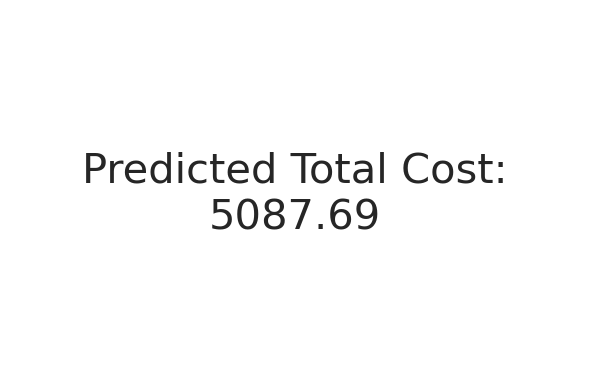

In [206]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create feature matrix X and target variable y
X = train_df[['Age', 'VIP','Transported']]  # Select the relevant columns for the features
y = train_df['TotalCost']     # Select the target variable

# Create linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions
age = 45   # Example age
vip = 1     # Example VIP status (1 for True, 0 for False)
transported = 0  # Example value for the 'Transported' feature (1 for True, 0 for False)


# Reshape the input as a 2D array since we have a single sample
prediction = model.predict(np.array([[age, vip, transported]]).reshape(1, -1))

print("Predicted Total Cost:", prediction)

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 4))
# Plot the text
plt.text(0.5, 0.5, f"Predicted Total Cost:\n{prediction[0]:.2f}", ha='center', va='center', fontsize=30)
# Remove the axis ticks and labels
plt.axis('off')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()


